## Carga de los datos

In [3]:
import cv2
import os
import numpy as np 
import keras
from tensorflow import keras
import matplotlib.pyplot as plt
import glob
import tensorflow as tf
from keras import utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import SparseCategoricalCrossentropy


In [4]:
import os
from tensorflow.keras.utils import get_file

# Directorio de keras
dataset_dir = os.path.expanduser("~/.keras/datasets")

# Descarga del archivo de  entrenamiento y descompresión
train_path = get_file(fname="simpsons_train.tar.gz", 
                      origin="https://onedrive.live.com/download?cid=C506CF0A4F373B0F&resid=C506CF0A4F373B0F%219337&authkey=AMzI92bJPx8Sd60",
                      cache_dir=dataset_dir,
                      cache_subdir='')

!tar -xzf {train_path} -C {dataset_dir}

# Descarga del archivo de  prueba y descompresión
test_path = get_file(fname="simpsons_test.tar.gz", 
                     origin="https://onedrive.live.com/download?cid=C506CF0A4F373B0F&resid=C506CF0A4F373B0F%219341&authkey=ANnjK3Uq1FhuAe8",
                     cache_dir=dataset_dir,
                     cache_subdir='')

!tar -xzf {test_path} -C {dataset_dir}


In [5]:
import os

dataset_dir = os.path.expanduser("~/.keras/datasets")

for root, dirs, files in os.walk(dataset_dir):
    print("Directorio:", root)
    for file in files:
        print("Archivo:", file)


Directorio: C:\Users\EVELYN/.keras/datasets
Archivo: simpsons_test.tar.gz
Archivo: simpsons_train.tar.gz
Directorio: C:\Users\EVELYN/.keras/datasets\fashion-mnist
Archivo: t10k-images-idx3-ubyte.gz
Archivo: t10k-labels-idx1-ubyte.gz
Archivo: train-images-idx3-ubyte.gz
Archivo: train-labels-idx1-ubyte.gz
Directorio: C:\Users\EVELYN/.keras/datasets\simpsons
Directorio: C:\Users\EVELYN/.keras/datasets\simpsons\abraham_grampa_simpson
Archivo: pic_0000.jpg
Archivo: pic_0001.jpg
Archivo: pic_0002.jpg
Archivo: pic_0003.jpg
Archivo: pic_0004.jpg
Archivo: pic_0005.jpg
Archivo: pic_0006.jpg
Archivo: pic_0007.jpg
Archivo: pic_0008.jpg
Archivo: pic_0009.jpg
Archivo: pic_0010.jpg
Archivo: pic_0011.jpg
Archivo: pic_0012.jpg
Archivo: pic_0013.jpg
Archivo: pic_0014.jpg
Archivo: pic_0015.jpg
Archivo: pic_0016.jpg
Archivo: pic_0017.jpg
Archivo: pic_0018.jpg
Archivo: pic_0019.jpg
Archivo: pic_0020.jpg
Archivo: pic_0021.jpg
Archivo: pic_0022.jpg
Archivo: pic_0023.jpg
Archivo: pic_0024.jpg
Archivo: pic_002

In [7]:
# Esta variable contiene un mapeo de número de clase a personaje.
# Utilizamos sólo los 18 personajes del dataset que tienen más imágenes.
MAP_CHARACTERS = {
    0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson',
    3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 
    7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson', 
    11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak', 
    14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'
}

# Vamos a standarizar todas las imágenes a tamaño 64x64
IMG_SIZE = 64

In [8]:
IMG_SIZE = 64
def load_train_set(dirname, map_characters, verbose=True):

    X_train = []
    y_train = []
    for label, character in map_characters.items():
        char_dir = os.path.join(dirname, character)
        if not os.path.exists(char_dir):
            if verbose:
                print(f"Directorio {char_dir} no encontrado, saltando...")
            continue
        
        files = os.listdir(char_dir)
        images = [file for file in files if file.endswith("jpg") or file.endswith("png")]
        if verbose:
            print(f"Leyendo {len(images)} imágenes encontradas de {character}")
        
        for image_name in images:
            image_path = os.path.join(char_dir, image_name)
            image = cv2.imread(image_path)
            if image is not None:
                resized_image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
                X_train.append(resized_image)
                y_train.append(label)
            else:
                if verbose:
                    print(f"Error al leer la imagen {image_path}")
    
    return np.array(X_train), np.array(y_train)


In [9]:
IMG_SIZE = 64
def load_test_set(dirname, map_characters, verbose=True):

    X_test = []
    y_test = []
    for label, character in map_characters.items():
        char_files = [file for file in os.listdir(dirname) if character in file]
        if verbose:
            print(f"Leyendo {len(char_files)} imágenes encontradas de {character}")
        
        for image_name in char_files:
            image_path = os.path.join(dirname, image_name)
            image = cv2.imread(image_path)
            if image is not None:
                resized_image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
                X_test.append(resized_image)
                y_test.append(label)
            else:
                if verbose:
                    print(f"Error al leer la imagen {image_path}")
    
    return np.array(X_test), np.array(y_test)



In [10]:

DATASET_TRAIN_PATH = '.keras/datasets/simpsons'
DATASET_TEST_PATH = '.keras/datasets/simpsons_testset'

X, y = load_train_set(DATASET_TRAIN_PATH, MAP_CHARACTERS)
X_t, y_t = load_test_set(DATASET_TEST_PATH, MAP_CHARACTERS)

Leyendo 913 imágenes encontradas de abraham_grampa_simpson
Leyendo 623 imágenes encontradas de apu_nahasapeemapetilon
Leyendo 1342 imágenes encontradas de bart_simpson
Leyendo 1193 imágenes encontradas de charles_montgomery_burns
Leyendo 986 imágenes encontradas de chief_wiggum
Leyendo 469 imágenes encontradas de comic_book_guy
Leyendo 457 imágenes encontradas de edna_krabappel
Leyendo 2246 imágenes encontradas de homer_simpson
Leyendo 498 imágenes encontradas de kent_brockman
Leyendo 1206 imágenes encontradas de krusty_the_clown
Leyendo 1354 imágenes encontradas de lisa_simpson
Leyendo 1291 imágenes encontradas de marge_simpson
Leyendo 1079 imágenes encontradas de milhouse_van_houten
Leyendo 1452 imágenes encontradas de moe_szyslak
Leyendo 1454 imágenes encontradas de ned_flanders
Leyendo 358 imágenes encontradas de nelson_muntz
Leyendo 1194 imágenes encontradas de principal_skinner
Leyendo 877 imágenes encontradas de sideshow_bob
Leyendo 48 imágenes encontradas de abraham_grampa_simp

Dimensiones de X: (18992, 64, 64, 3)
Dimensiones de y: (18992,)
Dimensiones de X_t: (890, 64, 64, 3)
Dimensiones de y_t: (890,)
Conjunto de entrenamiento: (15193, 64, 64, 3), (15193,)
Conjunto de validación: (3799, 64, 64, 3), (3799,)
Conjunto de prueba: (890, 64, 64, 3), (890,)


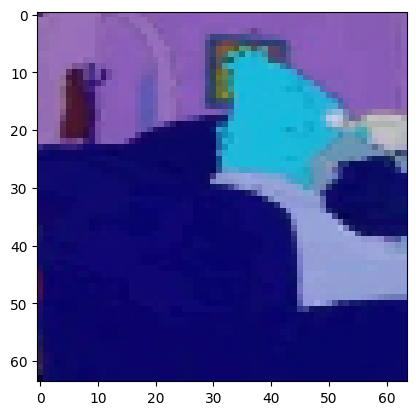

In [11]:
print(f"Dimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")
print(f"Dimensiones de X_t: {X_t.shape}")
print(f"Dimensiones de y_t: {y_t.shape}")

# para barajar aleatoriamente los datos
perm = np.random.permutation(len(X))
X, y = X[perm], y[perm]

# División de los conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Conjunto de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Conjunto de validación: {X_val.shape}, {y_val.shape}")
print(f"Conjunto de prueba: {X_t.shape}, {y_t.shape}")

# Ver si los conjuntos poseen datos o están vacíos 
if X_t.size > 0:
    plt.imshow(X_t[2])
    plt.show()
else:
    print("El conjunto de datos de prueba está vacío. Verifique la carga de datos.")

In [12]:

perm = np.random.permutation(len(X))
X, y = X[perm], y[perm]

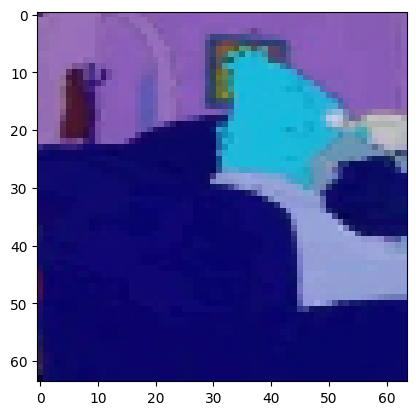

In [13]:
plt.imshow(X_t[2]) 


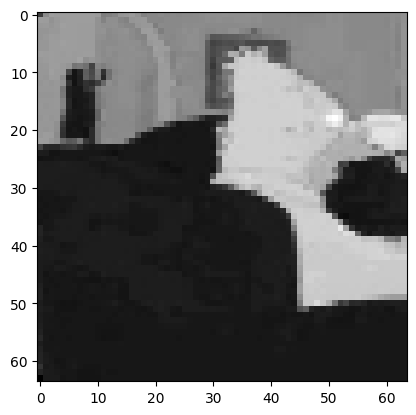

In [14]:
gray_image = cv2.cvtColor(X_t[2], cv2.COLOR_BGR2GRAY)

# Con esto convierto la imagen a blanco y negro
plt.imshow(gray_image, cmap='gray')
plt.show()

In [25]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [26]:
IMG_SIZE = 64
def load_train_set(dirname, map_characters, verbose=True):
    X_train = []
    y_train = []
    for label, character in map_characters.items():        
        files = os.listdir(os.path.join(dirname, character))
        images = [file for file in files if file.endswith("jpg")]
        if verbose:
            print(f"Leyendo {len(images)} imágenes encontradas de {character}")
        for image_name in images:
            image = cv2.imread(os.path.join(dirname, character, image_name))
            if image is not None:
                X_train.append(cv2.resize(image, (IMG_SIZE, IMG_SIZE)))
                y_train.append(label)
    return np.array(X_train), np.array(y_train)

# Cargamos el dataset de prueba
def load_test_set(dirname, map_characters, verbose=True):
    X_test = []
    y_test = []
    for label, character in map_characters.items():
        char_files = [file for file in os.listdir(dirname) if character in file]
        if verbose:
            print(f"Leyendo {len(char_files)} imágenes encontradas de {character}")
        for image_name in char_files:
            image_path = os.path.join(dirname, image_name)
            image = cv2.imread(image_path)
            if image is not None:
                resized_image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
                X_test.append(resized_image)
                y_test.append(label)
            else:
                if verbose:
                    print(f"Error al leer la imagen {image_path}")
    return np.array(X_test), np.array(y_test)

# Definimos los paths
DATASET_TRAIN_PATH = 'C:/Users/EVELYN/.keras/datasets/simpsons'
DATASET_TEST_PATH = 'C:/Users/EVELYN/.keras/datasets/simpsons_testset'

# Definimos el mapeo de personajes
MAP_CHARACTERS = {
    0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson',
    3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 
    7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson', 
    11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak', 
    14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'
}

# Cargamos los datos
X, y = load_train_set(DATASET_TRAIN_PATH, MAP_CHARACTERS)
X_t, y_t = load_test_set(DATASET_TEST_PATH, MAP_CHARACTERS)

# Normalizamos las imágenes
X = X / 255.0
X_t = X_t / 255.0

# Barajamos y dividimos los datos
perm = np.random.permutation(len(X))
X, y = X[perm], y[perm]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Conjunto de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Conjunto de validación: {X_val.shape}, {y_val.shape}")
print(f"Conjunto de prueba: {X_t.shape}, {y_t.shape}")


Leyendo 913 imágenes encontradas de abraham_grampa_simpson
Leyendo 623 imágenes encontradas de apu_nahasapeemapetilon
Leyendo 1342 imágenes encontradas de bart_simpson
Leyendo 1193 imágenes encontradas de charles_montgomery_burns
Leyendo 986 imágenes encontradas de chief_wiggum
Leyendo 469 imágenes encontradas de comic_book_guy
Leyendo 457 imágenes encontradas de edna_krabappel
Leyendo 2246 imágenes encontradas de homer_simpson
Leyendo 498 imágenes encontradas de kent_brockman
Leyendo 1206 imágenes encontradas de krusty_the_clown
Leyendo 1354 imágenes encontradas de lisa_simpson
Leyendo 1291 imágenes encontradas de marge_simpson
Leyendo 1079 imágenes encontradas de milhouse_van_houten
Leyendo 1452 imágenes encontradas de moe_szyslak
Leyendo 1454 imágenes encontradas de ned_flanders
Leyendo 358 imágenes encontradas de nelson_muntz
Leyendo 1194 imágenes encontradas de principal_skinner
Leyendo 877 imágenes encontradas de sideshow_bob
Leyendo 48 imágenes encontradas de abraham_grampa_simp

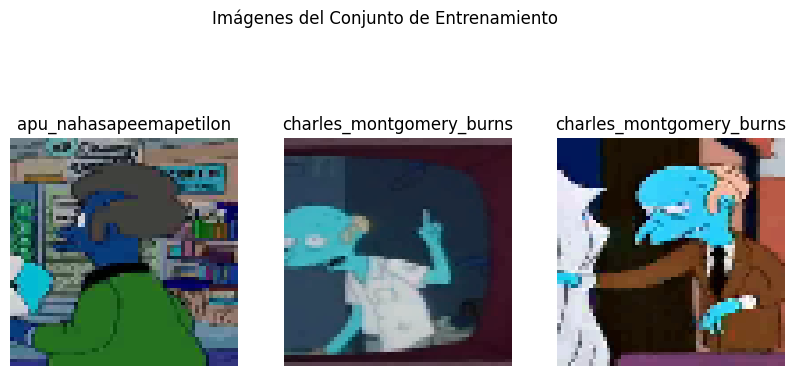

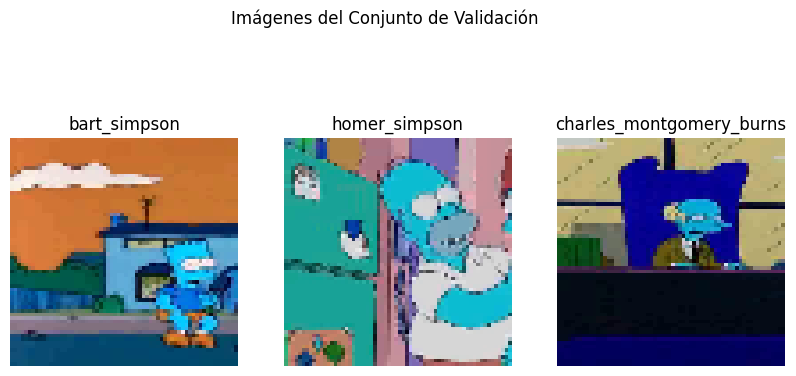

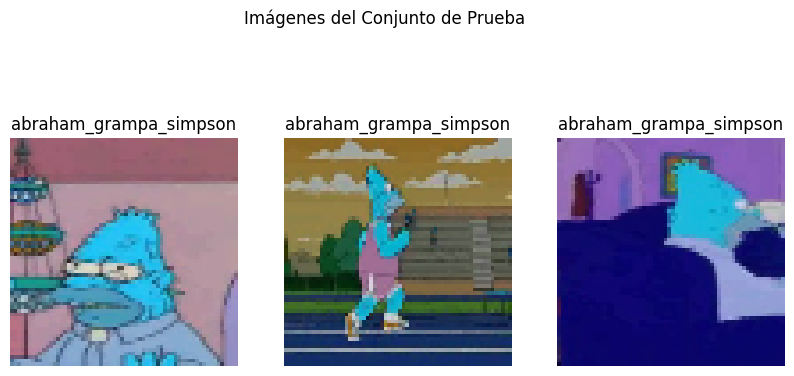

In [27]:
def show_images(images, labels, title):
    plt.figure(figsize=(10, 5))
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        plt.imshow(images[i])
        plt.title(MAP_CHARACTERS[labels[i]])
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Para mostrar algunas imágenes de los conjuntos y comprobar que funcione
show_images(X_train, y_train, "Imágenes del Conjunto de Entrenamiento")
show_images(X_val, y_val, "Imágenes del Conjunto de Validación")
show_images(X_t, y_t, "Imágenes del Conjunto de Prueba")

In [28]:
#Creación del modelo "Sequential" y añadidura de capas y optimizadores
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        MaxPooling2D((2, 2)),
        BatchNormalization(),
        
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        BatchNormalization(),
        
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        BatchNormalization(),
        
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(len(MAP_CHARACTERS), activation='softmax')
    ])

    model.compile(optimizer=Adam(),
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Bat  (None, 31, 31, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                      

In [37]:
#Los callbacks y selección del checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# entrenamiento con 50 capas
history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, checkpoint]
)




Epoch 1/50
475/475 [==============================] - 21s 44ms/step - loss: 0.2581 - accuracy: 0.9200 - val_loss: 0.9283 - val_accuracy: 0.8010
Epoch 2/50
475/475 [==============================] - 21s 44ms/step - loss: 0.2161 - accuracy: 0.9345 - val_loss: 0.8963 - val_accuracy: 0.7873
Epoch 3/50
475/475 [==============================] - 19s 41ms/step - loss: 0.1734 - accuracy: 0.9456 - val_loss: 1.0604 - val_accuracy: 0.8107
Epoch 4/50
475/475 [==============================] - 22s 46ms/step - loss: 0.1348 - accuracy: 0.9570 - val_loss: 0.8725 - val_accuracy: 0.8368
Epoch 5/50
475/475 [==============================] - 21s 45ms/step - loss: 0.1252 - accuracy: 0.9601 - val_loss: 0.8243 - val_accuracy: 0.8413
Epoch 6/50
475/475 [==============================] - 21s 45ms/step - loss: 0.1291 - accuracy: 0.9600 - val_loss: 0.6990 - val_accuracy: 0.8615
Epoch 7/50
475/475 [==============================] - 20s 43ms/step - loss: 0.1321 - accuracy: 0.9604 - val_loss: 0.9523 - val_accuracy:

In [30]:
# Luego seleccionamos el mejor modelo guardado
model.load_weights('best_model.h5')

# Y luego evaluamos en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_t, y_t)
print(f"Test accuracy: {test_acc}")

# Para mostrar las métricas de precisión y recall por clase
from sklearn.metrics import classification_report

y_pred = np.argmax(model.predict(X_t), axis=-1)
print(classification_report(y_t, y_pred, target_names=list(MAP_CHARACTERS.values())))

28/28 [==============================] - 0s 11ms/step - loss: 0.2538 - accuracy: 0.9427
Test accuracy: 0.9426966309547424
28/28 [==============================] - 0s 11ms/step
                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.97      0.79      0.87        48
  apu_nahasapeemapetilon       1.00      0.98      0.99        50
            bart_simpson       0.88      0.88      0.88        50
charles_montgomery_burns       0.80      0.98      0.88        48
            chief_wiggum       1.00      0.98      0.99        50
          comic_book_guy       1.00      0.84      0.91        49
          edna_krabappel       0.98      0.88      0.93        50
           homer_simpson       0.88      1.00      0.93        50
           kent_brockman       0.94      1.00      0.97        50
        krusty_the_clown       0.94      0.98      0.96        50
            lisa_simpson       0.86      0.98      0.92        50
           marge_simpson       

28/28 [==============================] - 0s 13ms/step


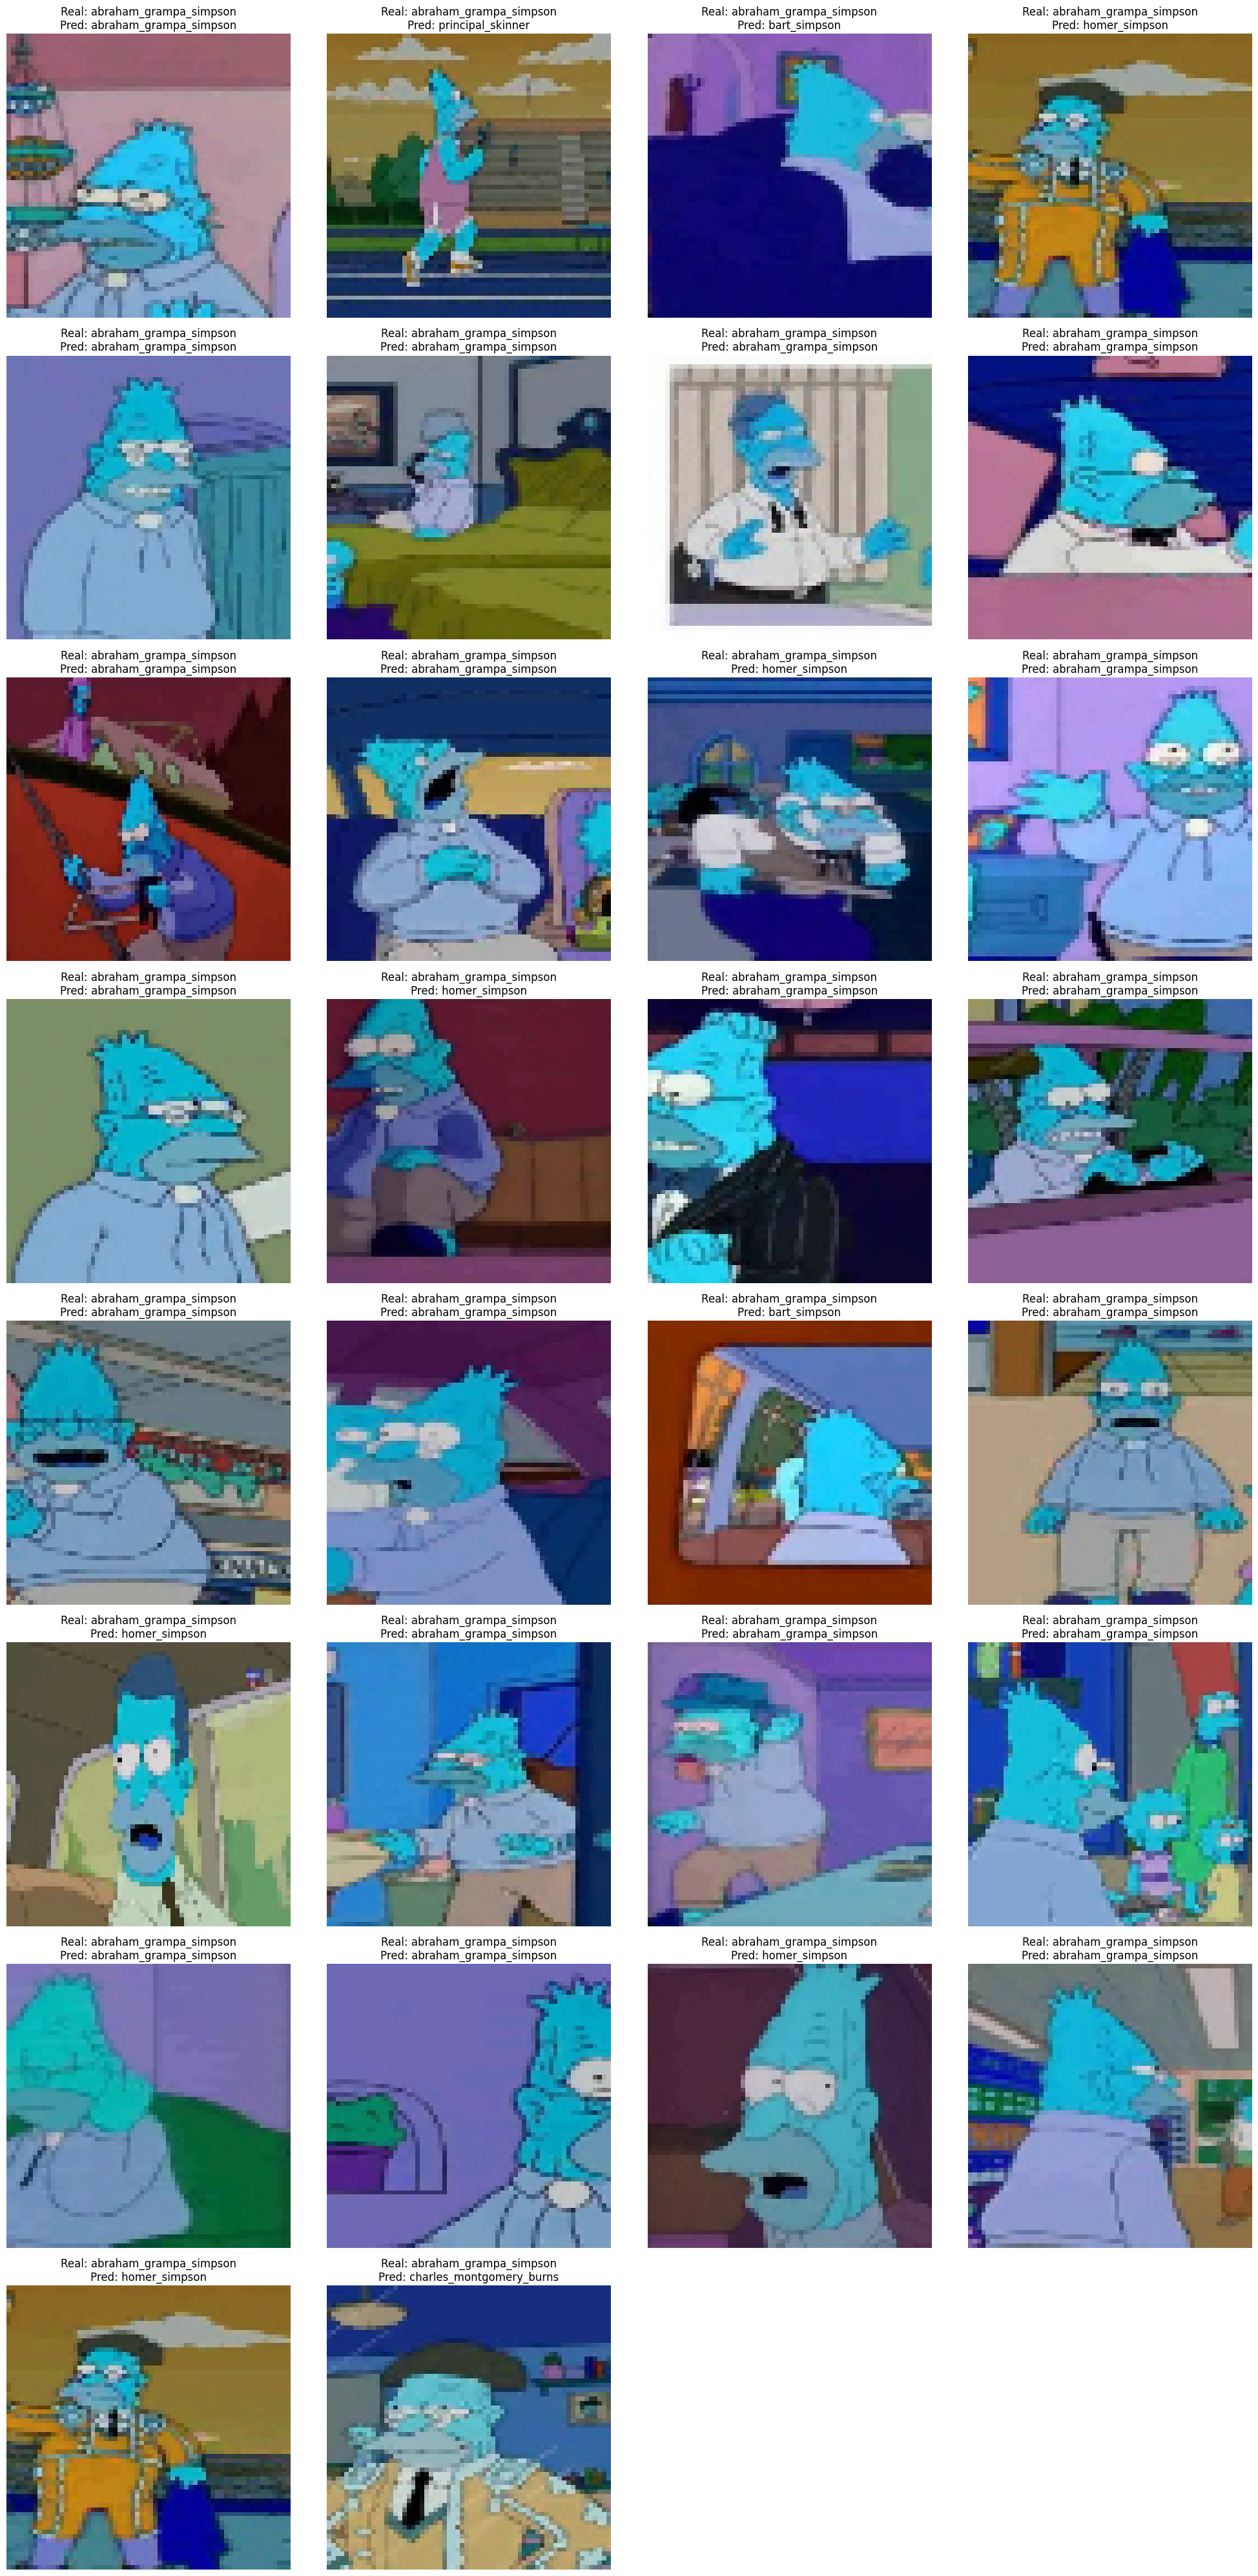

In [31]:
import math

def plot_examples(X, y_true, y_pred, class_map, num_examples=30):
    num_cols = 4
    num_rows = math.ceil(num_examples / num_cols)
    plt.figure(figsize=(num_cols * 5, num_rows * 5))
    for i in range(num_examples):
        plt.subplot(num_rows, num_cols, i+1)
        plt.imshow(X[i])
        plt.title(f"Real: {class_map[y_true[i]]}\nPred: {class_map[y_pred[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


# Se procede a la generación de las predicciones del modelo
y_pred = model.predict(X_t)
y_pred_classes = np.argmax(y_pred, axis=1)

# OJO! mapeo de las etiquetas de clase a nombres de personajes y visualización
class_map = {v: k for k, v in MAP_CHARACTERS.items()}

class_map_inv = {v: k for k, v in class_map.items()}
plot_examples(X_t, y_t, y_pred_classes, class_map_inv, num_examples=30)

28/28 [==============================] - 0s 11ms/step


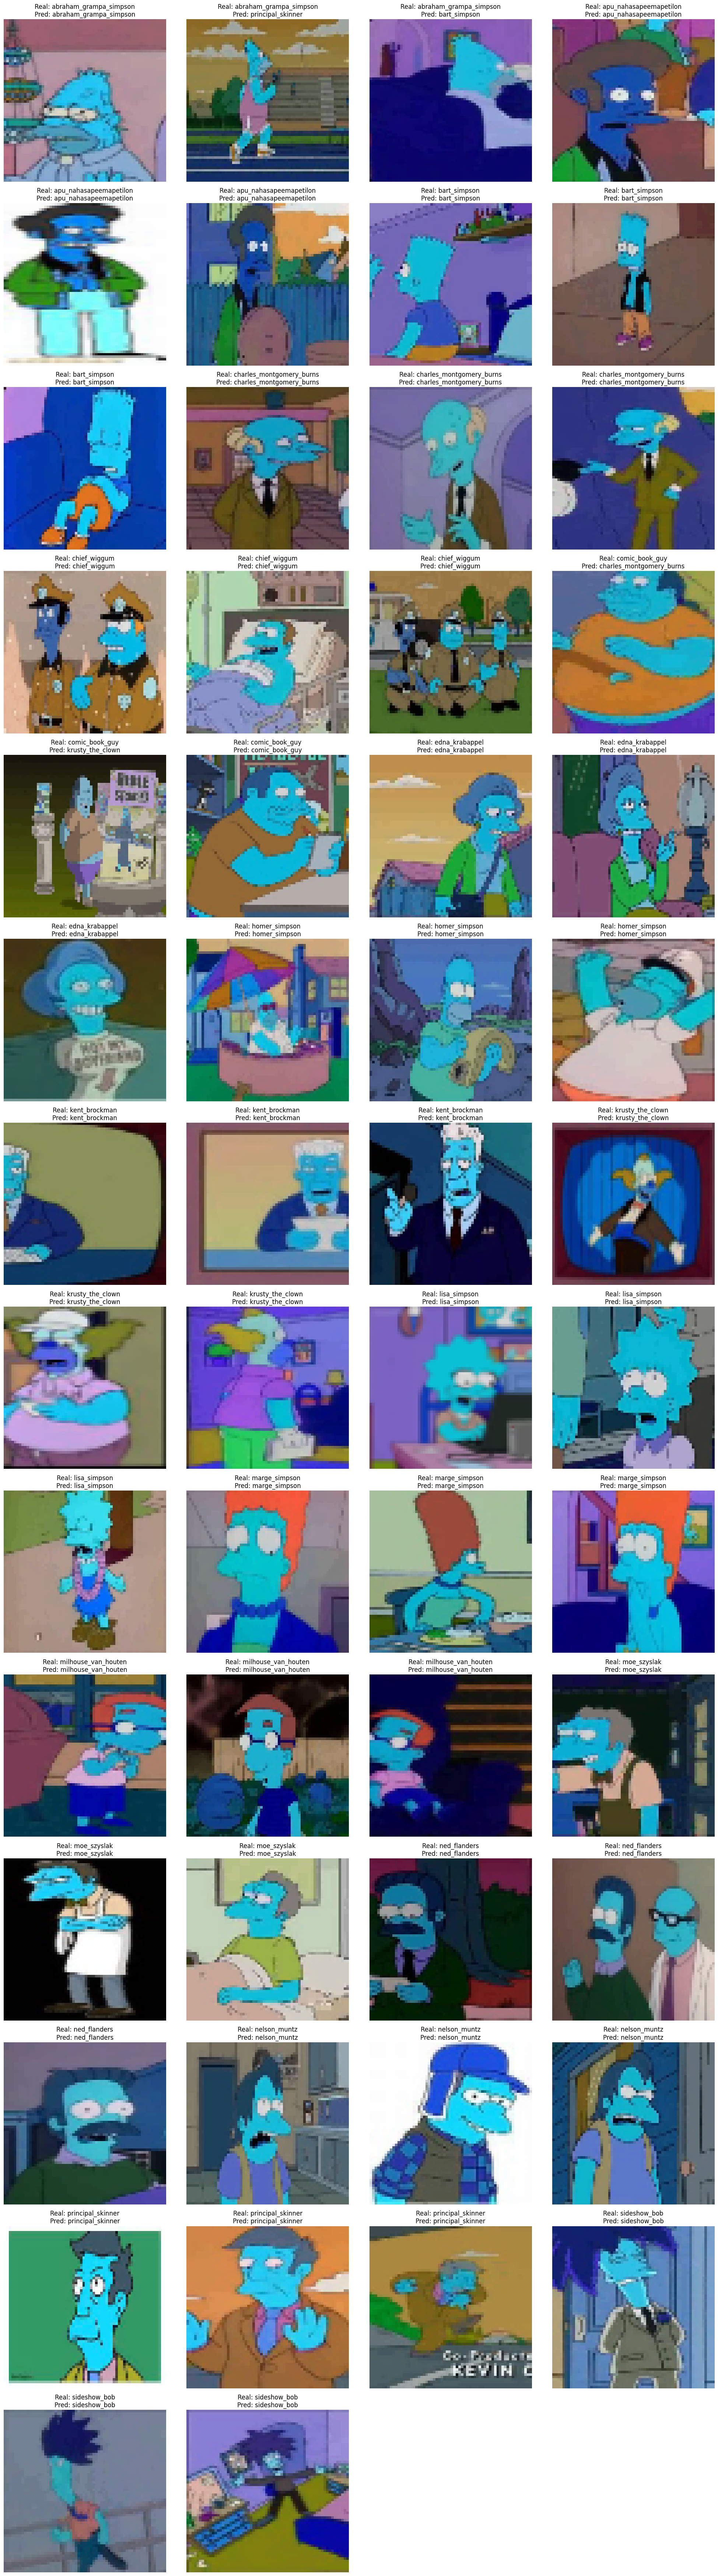

In [32]:

import math
import numpy as np
import matplotlib.pyplot as plt

def plot_examples(X, y_true, y_pred, class_map, num_examples_per_character=3):
    num_characters = len(class_map)
    num_cols = 4
    num_rows = math.ceil((num_characters * num_examples_per_character) / num_cols)
    plt.figure(figsize=(num_cols * 5, num_rows * 5))
    
  
    for character_id in range(num_characters):
        character_name = class_map[character_id]
        character_indices = np.where(y_true == character_id)[0]
        character_indices = character_indices[:num_examples_per_character]  
      
        for i, idx in enumerate(character_indices):
            plt.subplot(num_rows, num_cols, (character_id * num_examples_per_character) + i + 1)
            plt.imshow(X[idx])
            plt.title(f"Real: {character_name}\nPred: {class_map[y_pred[idx]]}")
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()


y_pred = model.predict(X_t)
y_pred_classes = np.argmax(y_pred, axis=1)


class_map = {v: k for k, v in MAP_CHARACTERS.items()}


class_map_inv = {v: k for k, v in class_map.items()}


plot_examples(X_t, y_t, y_pred_classes, class_map_inv, num_examples_per_character=3)


28/28 [==============================] - 0s 12ms/step - loss: 0.2538 - accuracy: 0.9427
Test accuracy: 0.9426966309547424
28/28 [==============================] - 0s 12ms/step


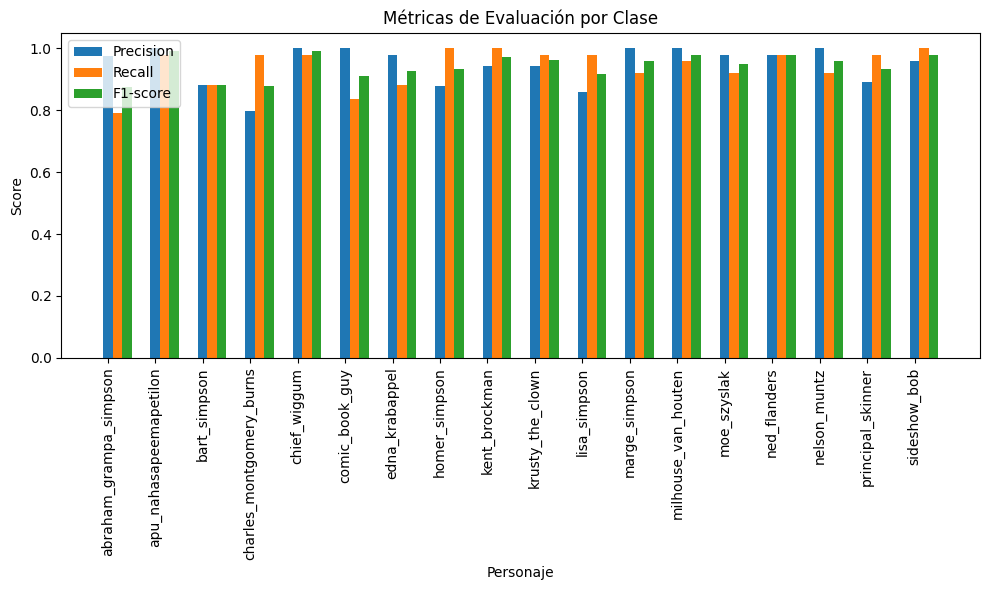

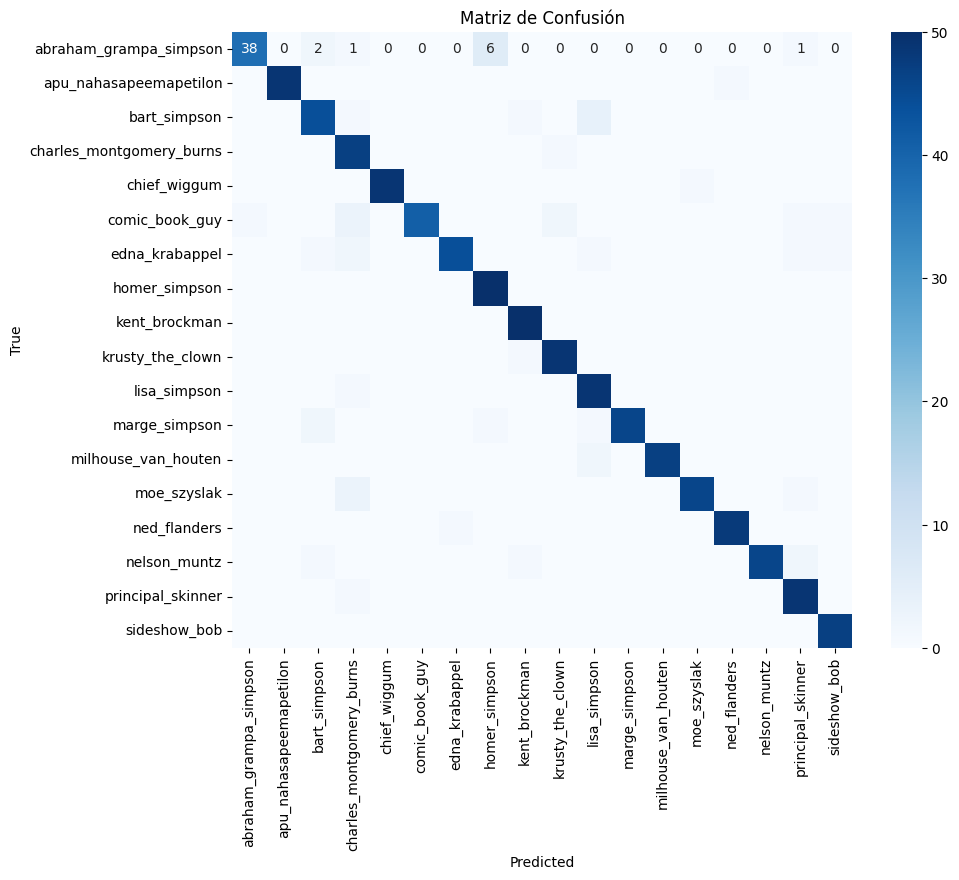

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


model.load_weights('best_model.h5')


test_loss, test_acc = model.evaluate(X_t, y_t)
print(f"Test accuracy: {test_acc}")


y_pred = np.argmax(model.predict(X_t), axis=-1)

# Para generar un reporte de clasificación
classification_rep = classification_report(y_t, y_pred, target_names=list(MAP_CHARACTERS.values()), output_dict=True)

# Para generar métricas de evaluación para cada clase
precision = [classification_rep[character]['precision'] for character in MAP_CHARACTERS.values()]
recall = [classification_rep[character]['recall'] for character in MAP_CHARACTERS.values()]
f1 = [classification_rep[character]['f1-score'] for character in MAP_CHARACTERS.values()]

# De manera a comprender mejor los resultados, se genera un gráfico de barras para precision, recall, f1-score por clase y la matrix de confusión 
plt.figure(figsize=(10, 6))
x = range(len(MAP_CHARACTERS))
plt.bar(x, precision, width=0.2, align='center', label='Precision')
plt.bar([i + 0.2 for i in x], recall, width=0.2, align='center', label='Recall')
plt.bar([i + 0.4 for i in x], f1, width=0.2, align='center', label='F1-score')
plt.xlabel('Personaje')
plt.ylabel('Score')
plt.title('Métricas de Evaluación por Clase')
plt.xticks(x, list(MAP_CHARACTERS.values()), rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

conf_matrix = confusion_matrix(y_t, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=list(MAP_CHARACTERS.values()), yticklabels=list(MAP_CHARACTERS.values()))
plt.title("Matriz de Confusión")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
